# Step 6 Neural Network & Pytorch

In [1]:
# Confirm the torch version.
import torch 
print(torch.__version__)

2.2.2


## Tensor

In [41]:
x = torch.tensor(5.0, requires_grad=True)
y = 3 * x ** 2
print(y)

# Differentiation derived from the back propagation.
y.backward()
print(x.grad)

tensor(75., grad_fn=<MulBackward0>)
tensor(30.)


## Gradient

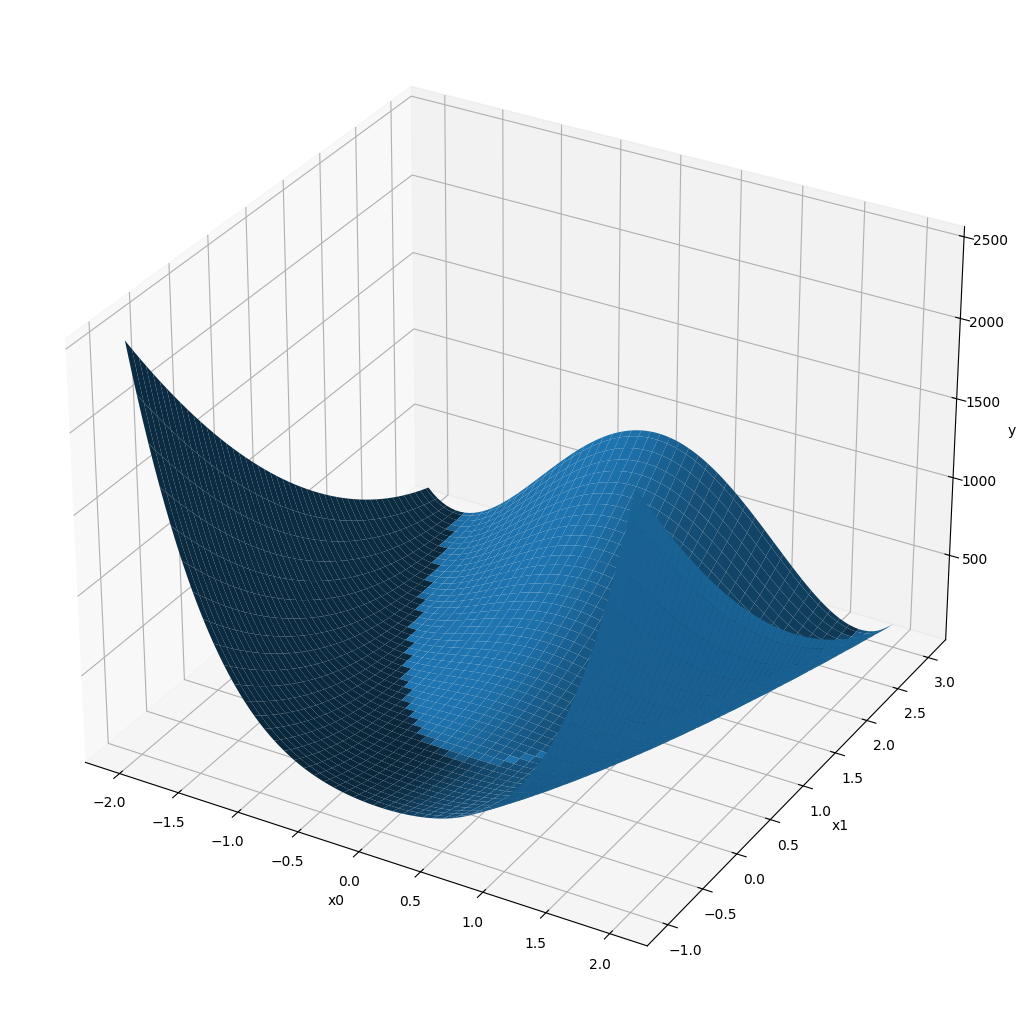

In [43]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the rosenbrock function.
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y
# Draw rosenbrock function.
nx0, nx1 = 100, 100

x0 = np.linspace(-2, 2, nx0)
x1 = np.linspace(-1, 3, nx1)

x0v, x1v = np.meshgrid(x0, x1)

y_old = rosenbrock(x0v, x1v)

fig =plt.figure(figsize=(10,10))
ax = Axes3D(fig)

fig.add_axes(ax)

ax.plot_surface(x0v, x1v, y_old)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.show()

tensor(-2.) tensor(200.)
0.0 1.0
0.6765419840812683 0.4561607241630554
0.8233093023300171 0.677053689956665
0.893169105052948 0.7972953915596008
0.9325319528579712 0.8693347573280334
0.9563955664634705 0.9145134091377258
0.9714366793632507 0.9435729384422302
0.9811335802078247 0.962546706199646
0.9874728322029114 0.9750520586967468
0.9916536211967468 0.9833434224128723
0.9944267272949219 0.9888620972633362


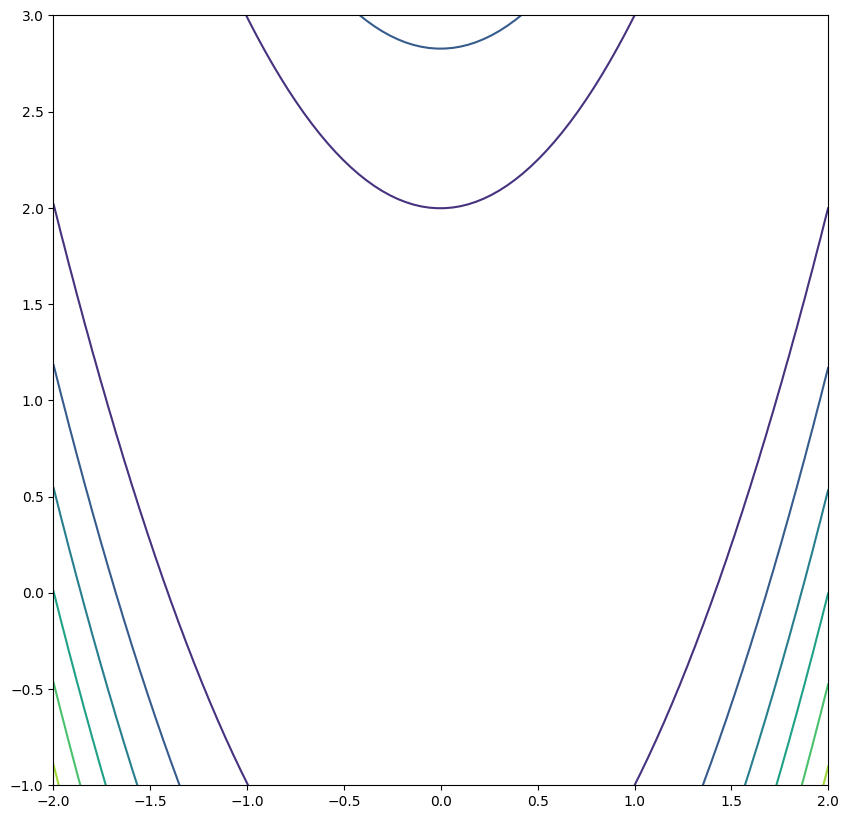

In [44]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(1.0, requires_grad=True)

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

lr = 0.001 # learning rate
iters = 10000 # iteration count

for i in range(iters):
    if i % 1000 == 0:
        print(x0.item(), x1.item())
        
    y = rosenbrock(x0, x1)
    
    # Back propagation.
    y.backward()
    
    # Get the gradient.
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data
    
    # Set the gradient zero.
    x0.grad.zero_()
    x1.grad.zero_()

print(x0.item(), x1.item())

plt.figure(figsize=(10,10))

plt.contour(x0v, x1v, y_old)


## Linear Regression

42.651763916015625
0.23957864940166473
0.11011795699596405
0.10364115983247757
0.09896989911794662
0.0954112559556961
0.09269963204860687
0.09063340723514557
0.0890590101480484
0.08785936236381531
0.08702587336301804
====
W = 2.2086358070373535
b = 5.384404182434082


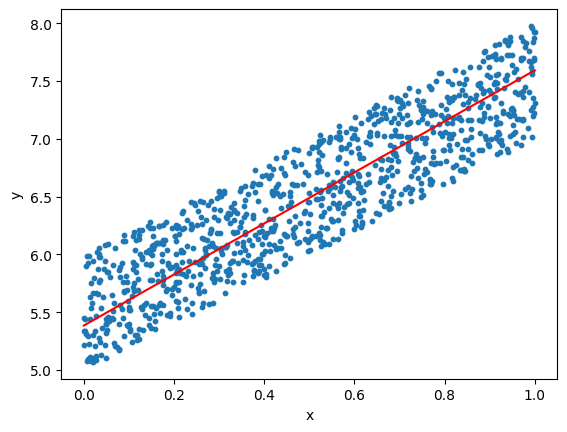

In [51]:
import torch
import torch.nn.functional as F

torch.manual_seed(0)
x = torch.rand(1000, 1)
y = 5 + 2 * x + torch.rand(1000, 1)

W = torch.zeros((1, 1), requires_grad=True) # Weight
b = torch.zeros(1, requires_grad=True) # Bias

# Prediction
def predict(x):
    y = x @ W + b
    return y

# Calculate the mean squared error between predicted values and correct values.
def mean_squared_error(x0, x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N

lr = 0.1 # learning rate
iters = 100 # iterations

for i in range(iters):
    y_hat = predict(x)
    # loss = mean_squared_error(y, y_hat)
    loss = F.mse_loss(y, y_hat) # Loss function
    loss.backward() # Back propagation
    
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    
    W.grad.zero_()
    b.grad.zero_()
    
    if i % 10 == 0:
        print(loss.item())

print(loss.item())
print('====')
print('W =', W.item())
print('b =', b.item())
 
# Plot
import matplotlib.pyplot as plt

plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
x = torch.tensor([[0.0],[1.0]])
y = W.detach().numpy() * x.detach().numpy() + b.detach().numpy()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Neuralnet

In [20]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

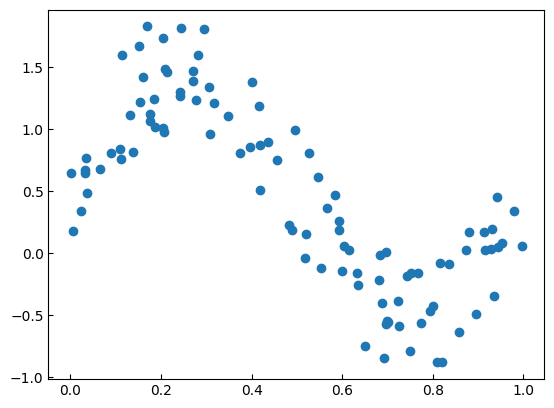

In [31]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

plt.scatter(x, y)

In [32]:
# Model

class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size=10, output_size=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y

0.7643452286720276
0.23656319081783295
0.23226074874401093
0.22441406548023224
0.21026140451431274
0.17957855761051178
0.11798418313264847
0.08477149903774261
0.08017536997795105
0.07965090870857239
0.07944046705961227


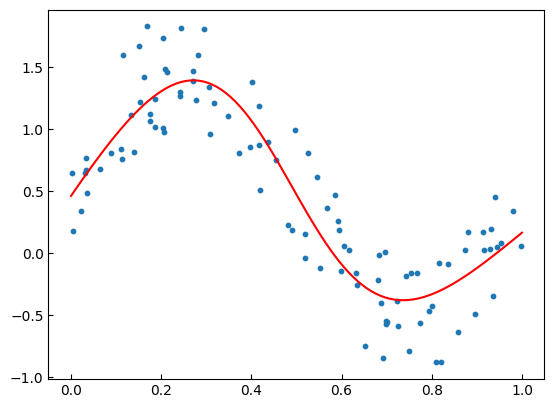

In [33]:
lr = 0.2
iters = 10000

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_pred = model(x) # Prediction
    loss = F.mse_loss(y, y_pred)
    optimizer.zero_grad()
    loss.backward() # Back propagation
    optimizer.step() # Optimizing step
    
    if i % 1000 == 0:
        print(loss.item())
    
print(loss.item())

# plot
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
x = torch.linspace(0, 1, 100).reshape(-1, 1)
y = model(x).detach().numpy()
plt.plot(x, y, color='red')
plt.show()

## Vision

In this section, we use torchvision package which is famous for the image processing tasks. As an example, codes below will use the MNIST dataset, which is the hand-written digits' dataset.

In [34]:
import torch 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

size: 60000
type: <class 'PIL.Image.Image'>
label: 5


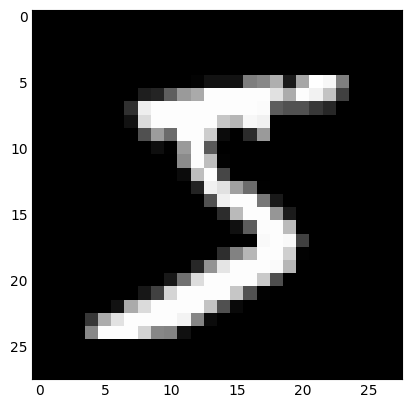

In [37]:
# MNIST 

# Download the MNIST dataset as images.
dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=None,
    download=True
)

x, label = dataset[0]

print('size:', len(dataset))
print('type:', type(x))
print('label:', label)

plt.imshow(x, cmap='gray')
plt.show()

In [38]:
# Proprocess

transform = transforms.ToTensor()

# Download the MNIST dataset as a tensor.
dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

x, label = dataset[0]

print('type:', type(x))
print('shape:', x.shape)

type: <class 'torch.Tensor'>
shape: torch.Size([1, 28, 28])


In [39]:
# DataLoader

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=32,
    shuffle=True
)

for x, label in dataloader:
    print('shape:', x.shape)
    print('label shape:', label.shape)
    break # Stop the loop to pick up onlt the first data.

shape: torch.Size([32, 1, 28, 28])
label shape: torch.Size([32])
